알고리즘 : 지도학습>분류 => LogisticRegression, DecisionTreeClassifier, VotingClassifier

[1] 데이터 준비

In [1]:
# 모듈 로딩
import pandas as pd
import numpy as np

In [2]:
data_file = '../data/mushrooms.csv'

In [3]:
dataDF = pd.read_csv(data_file)

In [4]:
dataDF.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
dataDF.keys()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
for i in dataDF.keys():
    print(f'{dataDF[i].value_counts()}')
    print()

class
e    4208
p    3916
Name: count, dtype: int64

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

bruises
f    4748
t    3376
Name: count, dtype: int64

odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

gill-attachment
f    7914
a     210
Name: count, dtype: int64

gill-spacing
c    6812
w    1312
Name: count, dtype: int64

gill-size
b    5612
n    2512
Name: count, dtype: int64

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

stalk-shape
t    4608
e    3516
Name: count, dtype: int64

stalk-root
b    3776
?    2480
e    1120
c     556
r     192

In [8]:
# 걍 ? 있는 열 삭제
dataDF.drop(columns = ['stalk-root'], inplace=True)

In [9]:
# 피쳐와 타겟 지정
featureDF = dataDF.drop(columns = ['class'])
targetSR = dataDF['class']

In [10]:
print(f'featureDF : {featureDF.shape}, {featureDF.ndim}')
print(f'targetSR : {targetSR.shape}, {targetSR.ndim}')

featureDF : (8124, 21), 2
targetSR : (8124,), 1


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()

In [13]:
encoder.fit(targetSR)

LabelEncoder()

In [14]:
targetSR = encoder.transform(targetSR)

In [15]:
columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
            'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
            'stalk-shape', 'stalk-surface-above-ring',
            'stalk-surface-below-ring', 'stalk-color-above-ring',
            'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
            'ring-type', 'spore-print-color', 'population', 'habitat']

In [16]:
newDF = pd.DataFrame()
for feature in columns:
    data = featureDF[feature]
    encoder = LabelEncoder()
    en_feature = encoder.fit_transform(featureDF[feature])
    newDF[feature] = en_feature

In [17]:
newDF.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [18]:
targetSR # p=0, e=1

array([1, 0, 0, ..., 0, 1, 0])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [20]:
X_train, X_test, y_train, y_test = train_test_split(newDF,
                                                    targetSR,
                                                    random_state=10,
                                                    stratify=targetSR)

In [21]:
print(f'X_train : {X_train.shape}, {X_train.ndim}/ y_train : {y_train.shape}, {y_train.ndim}')
print(f'X_test : {X_test.shape}, {X_test.ndim}/ y_test : {y_test.shape}, {y_test.ndim}')

X_train : (6093, 21), 2/ y_train : (6093,), 1
X_test : (2031, 21), 2/ y_test : (2031,), 1


In [22]:
# 모델 인스턴스 생성
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [23]:
from sklearn.model_selection import StratifiedKFold, cross_validate,GridSearchCV

In [24]:
params = {'max_depth': [4,3,2,1],
          'min_samples_leaf': [5,3,2]} # 각 모듈의 하이퍼 파리미터를 넣는데 내가 그 하이퍼 파라미터를 찾아야한다 \\

#==> model 들 조합 각 파라미터마다 적용 model이 그만큼 많이 늘어난다. 각 조건의 값 마다 곱해진다. 

In [25]:
gscv = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=params,
                    return_train_score=True,
                    refit=True)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), param_grid={},
             return_train_score=True)

In [26]:
print(f'[ gscv.best_params_ ] {gscv.best_params_}')
print(f'[ gscv.best_score_ ] {gscv.best_score_}')
print(f'[ gscv.best_estimator_ ] {gscv.best_estimator_}')


[ gscv.best_params_ ] {}
[ gscv.best_score_ ] 1.0
[ gscv.best_estimator_ ] DecisionTreeClassifier()


+ 더 비교해야한다~~~ 어제 표로했는거 까지 봐야한다.

#### 아 모르겠다. VotingClassifier으로 해보자

In [27]:
featureDF.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [28]:
newDF.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [29]:
targetSR

array([1, 0, 0, ..., 0, 1, 0])

In [30]:
print(f'featureDF : {featureDF.shape}, {featureDF.ndim}')
print(f'targetSR : {targetSR.shape}, {targetSR.ndim}')

featureDF : (8124, 21), 2
targetSR : (8124,), 1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(newDF,
                                                    targetSR,
                                                    stratify= targetSR,
                                                    random_state=10)

In [32]:
print(f'X_train : {X_train.shape}, {X_train.ndim}/ y_train : {y_train.shape}, {y_train.ndim}')
print(f'X_test : {X_test.shape}, {X_test.ndim}/ y_test : {y_test.shape}, {y_test.ndim}')


X_train : (6093, 21), 2/ y_train : (6093,), 1
X_test : (2031, 21), 2/ y_test : (2031,), 1


In [33]:
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [34]:
print(f'[ dt_model.classes_ ] {dt_model.classes_}')
print(f'[ dt_model.n_classes_ ] {dt_model.n_classes_}개')
print(f'[ dt_model.max_features_ ] {dt_model.max_features_}개')
print(f'[ dt_model.feature_names_in_ ] {dt_model.feature_names_in_}')
print(f'[ dt_model.feature_importances_ ] {dt_model.feature_importances_}')

[ dt_model.classes_ ] [0 1]
[ dt_model.n_classes_ ] 2개
[ dt_model.max_features_ ] 21개
[ dt_model.feature_names_in_ ] ['cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor' 'gill-attachment'
 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape'
 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-type'
 'veil-color' 'ring-number' 'ring-type' 'spore-print-color' 'population'
 'habitat']
[ dt_model.feature_importances_ ] [0.         0.         0.00385406 0.02875376 0.03662531 0.
 0.         0.11781918 0.34525098 0.02330334 0.         0.00213117
 0.         0.01953426 0.         0.         0.00067253 0.00245407
 0.20427024 0.17388996 0.04144114]


In [35]:
train_score = dt_model.score(X_train,y_train)
test_score = dt_model.score(X_test,y_test)
print(f'train_score, test_score = {train_score}, {test_score}')

train_score, test_score = 1.0, 1.0


In [36]:
from sklearn.model_selection import StratifiedKFold, cross_validate,GridSearchCV

# 교차검증 준비 => 모델 인스턴스, trainDS, cv=5 (기본)
dt_model2 = DecisionTreeClassifier(random_state=10)
result = cross_validate(dt_model2, X_train, y_train,
                        return_train_score=True,
                        return_estimator=True)

In [37]:
resultDF =pd.DataFrame(result)

In [38]:
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.009824,0.003065,DecisionTreeClassifier(random_state=10),1.0,1.0
1,0.008038,0.000000,DecisionTreeClassifier(random_state=10),1.0,1.0
2,0.000000,0.017327,DecisionTreeClassifier(random_state=10),1.0,1.0
3,0.000000,0.000000,DecisionTreeClassifier(random_state=10),1.0,1.0
4,0.002501,0.000000,DecisionTreeClassifier(random_state=10),1.0,1.0


In [39]:
params = {'max_depth': [4,3,2,1],
          'min_samples_leaf': [5,3,2]}

In [40]:
gscv = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=params,
                    return_train_score=True, refit=True) # refit[매개변순] - best로 다시 학습
gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [41]:
print(f'[ gscv.best_params_ ] {gscv.best_params_}')
print(f'[ gscv.best_score_ ] {gscv.best_score_}')
print(f'[ gscv.best_estimator_ ] {gscv.best_estimator_}')

[ gscv.best_params_ ] {'max_depth': 4, 'min_samples_leaf': 5}
[ gscv.best_score_ ] 0.9776784114681204
[ gscv.best_estimator_ ] DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)


In [42]:
cv_resultDF = pd.DataFrame(gscv.cv_results_)
cv_resultDF.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [43]:
best_model= gscv.best_estimator_

In [44]:
print(f'[best_model.max_depth] : {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] : {best_model.min_samples_leaf}')

[best_model.max_depth] : 4
[best_model.min_samples_leaf] : 5


In [45]:
print(best_model.feature_importances_, best_model.n_features_in_,best_model.feature_names_in_, sep='\n')

[0.         0.         0.         0.         0.03942011 0.
 0.         0.14089301 0.37159636 0.02508157 0.         0.0022938
 0.01641562 0.         0.         0.         0.         0.
 0.20863516 0.18715913 0.00850524]
21
['cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor' 'gill-attachment'
 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape'
 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-type'
 'veil-color' 'ring-number' 'ring-type' 'spore-print-color' 'population'
 'habitat']


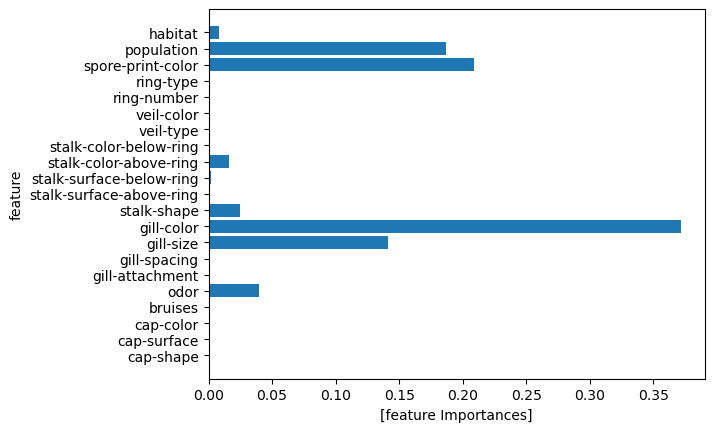

In [46]:
import matplotlib.pyplot as plt
plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel('[feature Importances]')
plt.ylabel('feature')
plt.show()

In [47]:
from sklearn.tree import export_graphviz

export_graphviz(best_model, 
                out_file='tree.dot',
                class_names=['setosa','versicolor','verginlca'],
                feature_names= best_model.feature_names_in_,
                impurity=True, filled=True, rounded=True)

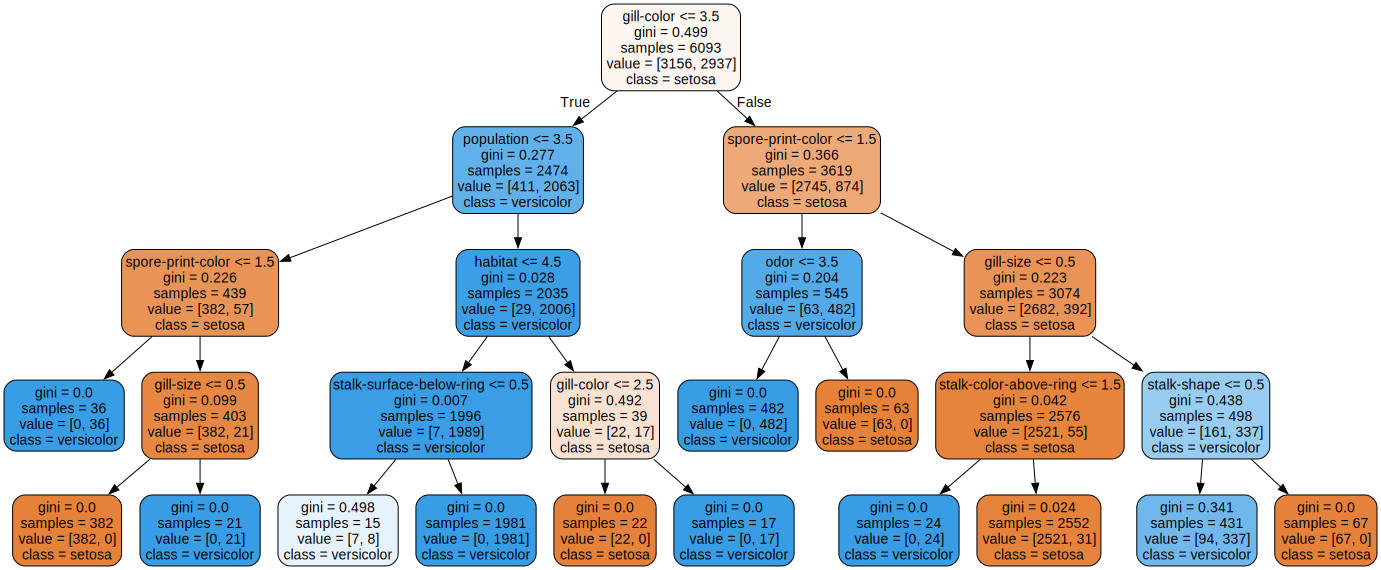

In [48]:
## (2) dot파일 출력
import graphviz

# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data=f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

LogisticRegression를 해보자.   
뭔지 모르겠다   
뭘해야하는걸까?   